## 1. Case Study Introduction 

This case study aims to give an idea of applying Machine Learning to customer segmentation. Market segmentation is the process of dividing a broad consumer or business market, usually consisting of existing and potential customers, into subsets of consumers based on common characteristics. Clustering Algorithms are used to tackle such segmentation.

### 1.1 Problem Statement

As a junior data analyst intern in a firm. For one of the clients XYZ marketings, your manager asked you to do a customer segmentation ML
model that can, later on, be developed to give recommendations like saving plans, loans, wealth management, etc. on target customer groups
of XYZ Marketings. For this, you have been provided with a dataset summarising the usage behavior of active credit card holders during the
last 6 months in XYZ Marketings.

### 1.2 Data Understanding 

- The dataset summarizes the usage behaviour for 8950 active credit card holders for the past 6 months. The dataset comprises data at the
  customer level with 18 variables.
- The columns are as follows:
   - Customer ID
   - Balance
   - Balance Frequency
   - Purchases
   - One-off Purchases
   - Installment Purchases
   - Cash Advance
   - Purchases Frequency
   - One-off Purchases Frequency
   - Purchases Installments Frequency
   - Cash Advance Frequency
   - Cash Advance TRX
   - Purchases TRX
   - Credit Limit
   - Payments
   - Minimum Payments
   - PRC Full payment
   - Tenure

## 2. Data Exploration

## 2.1 Read the Data File
- We will first read the data file which includes importing the required libraries, loading the dataset & viewing it.

In [1]:
# import the requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset 
df = pd.read_csv('CustomerData.csv')

In [3]:
# viewing the first 5 rows
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 2.2 Inspect the Data Frame
- Next we will check the various attributes like shape (rows and cols) & datatypes

In [4]:
df.shape

(8950, 18)

In [5]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

- Next we will check null values per column.

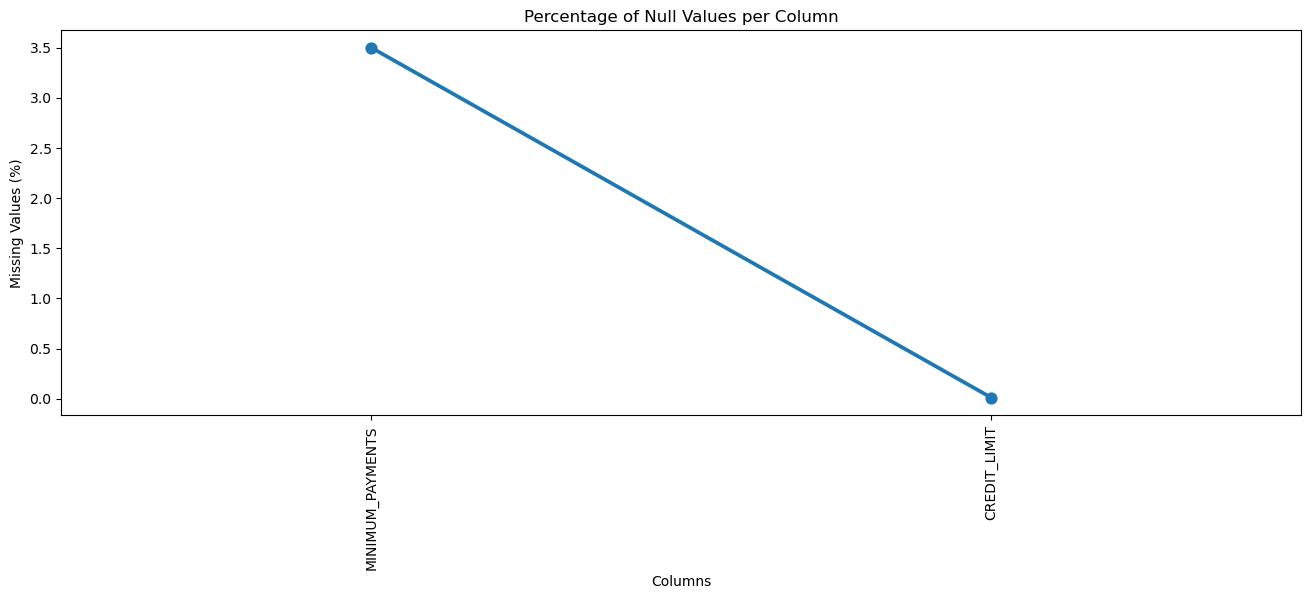

In [3]:
#check null value per col
#Count null values per column
null_count = df.isnull().sum()
# get no of rows
total_count = df.shape[0]
# Calculate percentage of nulls and round to 2 decimal places
null_pct = ((null_count / total_count) * 100).round(2)
#Filter only columns with missing values (makes plot cleaner)
null_pct = null_pct[null_pct > 0].sort_values(ascending=False)

#Plot using pointplot
plt.figure(figsize=(16,5))
sns.pointplot(x=null_pct.index, y=null_pct.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Missing Values (%)")
plt.title("Percentage of Null Values per Column")
plt.show()

- From the graph, it can be seen that there are 2 columns with null values.

## 3. Data Cleaning

### 3.1 Missing Value Imputation
- We will impute the null values with the median.

In [4]:
cols_to_impute = ['MINIMUM_PAYMENTS','CREDIT_LIMIT']

for col in cols_to_impute:
    df[col].fillna(df[col].median(), inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_22280\3116099228.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace = True)


In [5]:
# sanity check to see if there are remaining null values
null_col_check = df.isnull().sum().sum()
null_col_check

np.int64(0)

## 4. Data Analysis
- We will peform univariate analysis & correlation to better understand our data.

### 4.1 Univariate Analysis

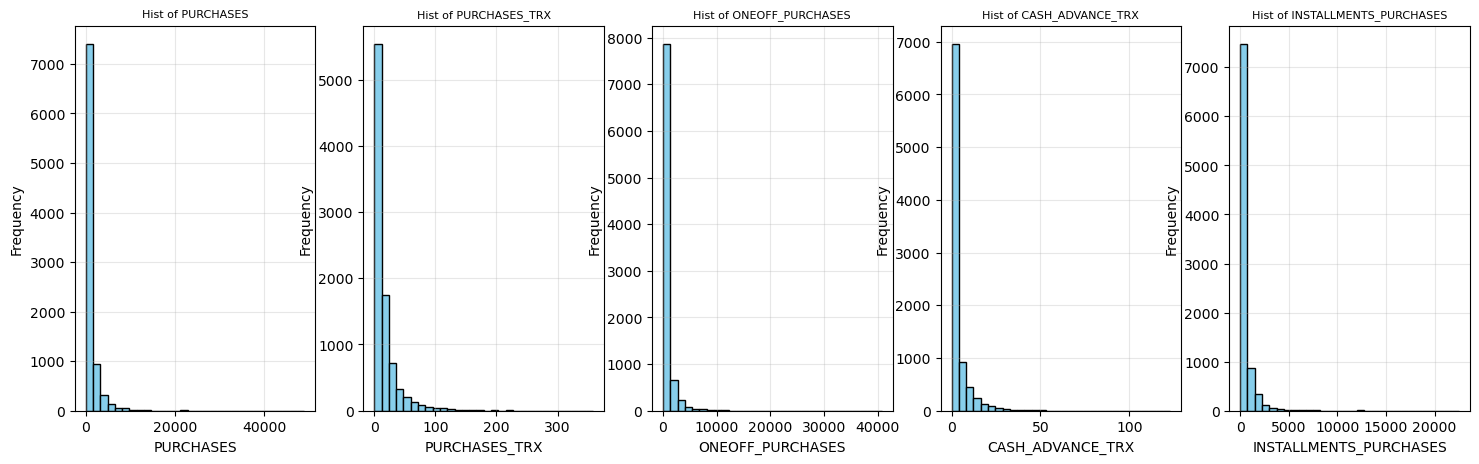

In [7]:
num_cols = ['PURCHASES', 'PURCHASES_TRX', 'ONEOFF_PURCHASES', 'CASH_ADVANCE_TRX', 'INSTALLMENTS_PURCHASES']

fig, axes = plt.subplots(1, 5, figsize=(18, 5))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Hist of {col}', fontsize=8)
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

- As people make more purchases (higher total amount, more transactions, more one-off buys, more installments, or more cash advances), they actually do   it less frequently.

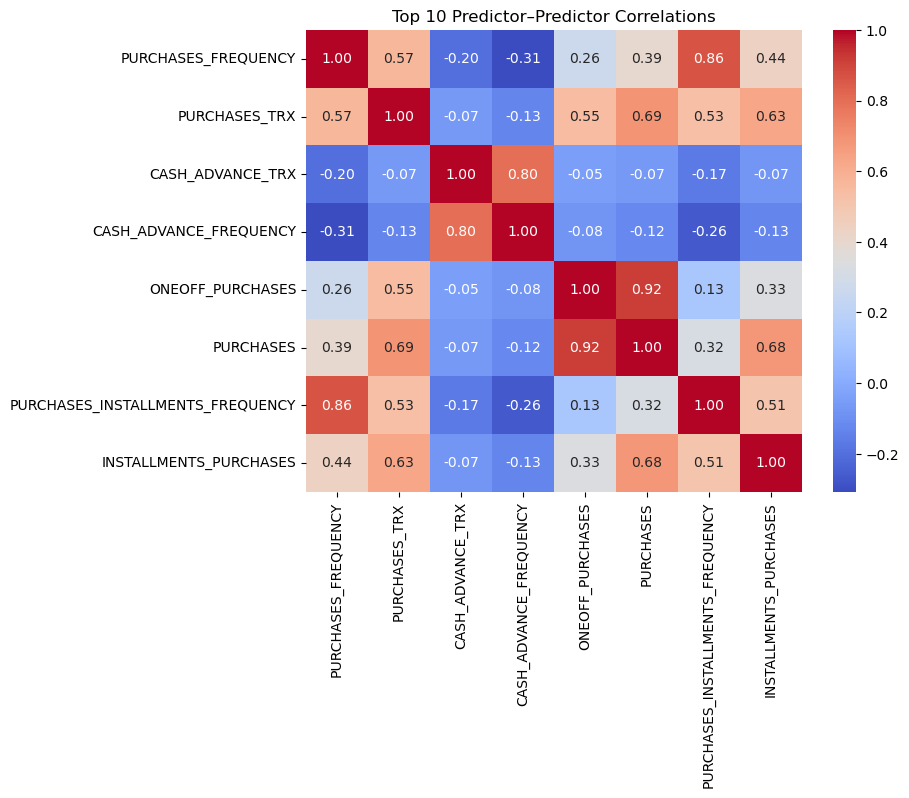

In [20]:
num_df = df.select_dtypes(include=['int64', 'float64'])
# drop target and id if present
num_df = num_df.drop(columns=['Id'], errors='ignore')
corr_matrix = num_df.corr().abs()
# remove self-correlation (diagonal = 1)
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

top10_pairs = (
    upper_triangle
    .stack()
    .sort_values(ascending=False)
    .head(5)
)

top_features = list(set(top10_pairs.index.get_level_values(0)) |
                    set(top10_pairs.index.get_level_values(1)))

plt.figure(figsize=(8,6))
sns.heatmap(
    num_df[top_features].corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Top 10 Predictor–Predictor Correlations')
plt.show()

- PURCHASES_FREQUENCY has a very strong positive correlation with PURCHASES_INSTALLMENTS_FREQUENCY. This indicates that customers who make purchases
  more often are highly likely to also make installment purchases more often.
- PURCHASES has a very strong postive correlation with ONE_OFF_PURCHASES indicating that most purchases made are one off.
- CASH_ADVANCE_FREQUENCY has a moderate negative correlation with PURCHASES_FREQUENCY indicating that as that as purchase frequency increases, the
  frequency of cash advances tends to decrease.

## 5. Predictive Analytics 

- We will use clustering using K Means
- In clustering, there is no predefined target.
- So we must experiment with different values of k and evaluate which one works best.
- This process is called hyperparameter tuning.
- Here k (number of clusters) is the main hyperparameter.

- We will drop the ids first because they hold no predictive power.

In [6]:
X = df.drop(columns=['CUST_ID'])

- Then we perform feature scaling to ensure all features are treated equally.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

- For K Means, we will use the Elbow method to evaluate Within-Cluster Sum of Squares (WCSS)
- WCSS measures compactness of clusters.

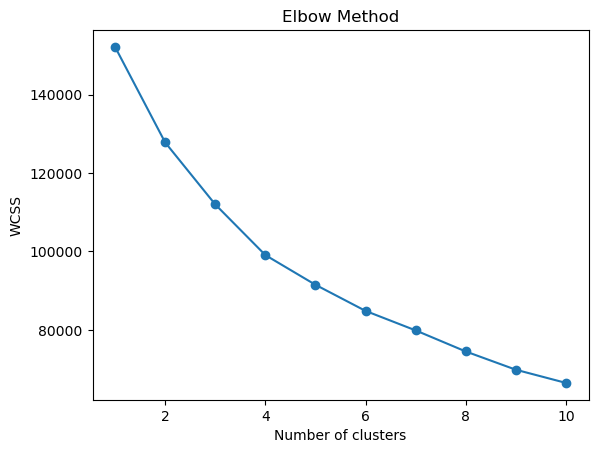

In [8]:
from sklearn.cluster import KMeans
# using elbow method
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

- Then we will use Silhouette Score to measure how well-separated the clusters are.

In [9]:
# Chosen based on elbow curve
from sklearn.metrics import silhouette_score
kmeans_scores = {}

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    kmeans_scores[k] = silhouette_score(X_scaled, labels)
    print(f"KMeans k={k} → Silhouette = {kmeans_scores[k]:.3f}")

KMeans k=2 → Silhouette = 0.280
KMeans k=3 → Silhouette = 0.207
KMeans k=4 → Silhouette = 0.166
KMeans k=5 → Silhouette = 0.193
KMeans k=6 → Silhouette = 0.192
KMeans k=7 → Silhouette = 0.215


- We will use Agglomerative clustering.
- Agglomerative clustering does not rely on inertia; therefore, Silhouette Score was used to evaluate different values of k.

In [10]:
from sklearn.cluster import AgglomerativeClustering
agg_scores = {}

for k in range(2, 8):
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(X_scaled)
    agg_scores[k] = silhouette_score(X_scaled, labels)
    print(f"Agglomerative k={k} → Silhouette = {agg_scores[k]:.3f}")

Agglomerative k=2 → Silhouette = 0.192
Agglomerative k=3 → Silhouette = 0.167
Agglomerative k=4 → Silhouette = 0.160
Agglomerative k=5 → Silhouette = 0.176
Agglomerative k=6 → Silhouette = 0.159
Agglomerative k=7 → Silhouette = 0.162


- Next we will use Guassian Mixture Model (GMM).
- Similarly, we will use Silhouette Score to evaluate different values of K.

In [11]:
from sklearn.mixture import GaussianMixture
gmm_scores = {}

for k in range(2, 8):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_scaled)
    gmm_scores[k] = silhouette_score(X_scaled, labels)
    print(f"GMM k={k} → Silhouette = {gmm_scores[k]:.3f}")

GMM k=2 → Silhouette = 0.196
GMM k=3 → Silhouette = 0.098
GMM k=4 → Silhouette = 0.104
GMM k=5 → Silhouette = 0.071
GMM k=6 → Silhouette = 0.053
GMM k=7 → Silhouette = 0.043


- Since KNN Means with k = 2 gives the highest Silhouette Score, we will choose it as our model.
- We will then add the clustered labels to the dataset.

In [12]:
final_model = KMeans(n_clusters=2, random_state=42)
final_labels = final_model.fit_predict(X_scaled)

df['Cluster'] = final_labels

In [13]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


- Next we will perform cluster profiling to obtain some business insights.

In [15]:
cluster_profile = df.groupby('Cluster').mean(numeric_only=True)
cluster_profile

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,2147.310087,0.979774,3364.893645,2075.077145,1290.139081,761.443235,0.937914,0.588182,0.712940,0.082253,2.232258,46.131183,7182.543988,3595.423358,1195.056462,0.285596,11.891935
1,1411.573053,0.850380,383.636260,203.479687,180.450879,1035.911430,0.372936,0.101266,0.273011,0.149020,3.515515,6.466714,3789.040383,1244.590977,753.048031,0.119117,11.419041


- Cluster 0:
  - Balance: High -> Maintains a high balance
  - Purchases: High -> Higher purchases
  - Purchases frequency: High -> Higher purchase frequency -> Active users
  - Credit limit: High
  - Tenure: Higher -> Older customers
  - One-off purchases: High

  These are premium & active customers  who make higher & more often purchases with a high account balance.

- Cluster 1:
  - Balance: Moderate -> Maintains a low balance
  - Purchases: Low -> Lower purchases
  - Purchases frequency: Low -> Low purchase frequency -> Less engaged users
  - Credit limit: Low
  - Tenure: Lower -> Relatively newer customers
  - One-off purchases: Low

  These are less engaged customers who make lower & less often purchases with a moderate account balance.

- Then we will visualize the clusters.
- PCA was used to project high-dimensional customer data into two dimensions for visualization. This allows clearer visual separation of clusters while   preserving the maximum amount of information from the original features.

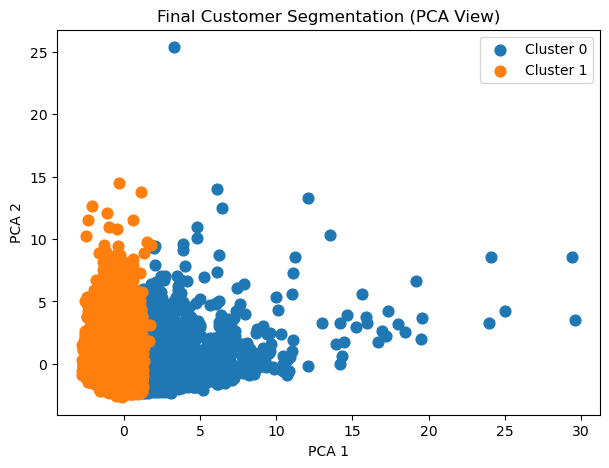

In [20]:
from sklearn.decomposition import PCA

plt.figure(figsize=(7,5))

for cluster in np.unique(final_labels):
    plt.scatter(
        X_pca[final_labels == cluster, 0],
        X_pca[final_labels == cluster, 1],
        s=60,
        label=f"Cluster {cluster}"
    )

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Final Customer Segmentation (PCA View)")
plt.legend()
plt.show()

- The PCA plot shows clear separation between clusters, suggesting that the clustering model effectively distinguishes customers based on their
  behavioral patterns.
- Customers within the same cluster are closely grouped, indicating similar usage behavior, while different clusters show distinct financial profiles.

## 6. Conclusion 

- Based on the business insights derived, XYZ marketings should do as follows:
- For cluster 0:
   - Goal: Invest in keeping them loyal.
      - Travel rewards, cashback, loyalty programs
      - Priority customer service
      - Provide higher credit limits
      - Offer premium credit cards
- For cluster 1:
   - Goal: Increase their usage safely.
      - Low-risk loans or savings plan
      - Usage reminders/incentives
      - Basic cashback offers